In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./Imbalanced_Dataset.csv')
df

,Feature1,Feature2,Target
0,0.496714,-0.138264,0
1,0.647689,1.523030,0
2,-0.234153,-0.234137,0
3,1.579213,0.767435,0
4,-0.469474,0.542560,0
...,...,...,...
995,0.800410,0.754291,0
996,1.188913,0.708304,0
997,0.351448,1.070150,0
998,-0.026521,-0.881875,0


In [5]:
df['Target'].value_counts()

0    906
1     94
Name: Target, dtype: int64

<Axes: xlabel='Feature1', ylabel='Feature2'>

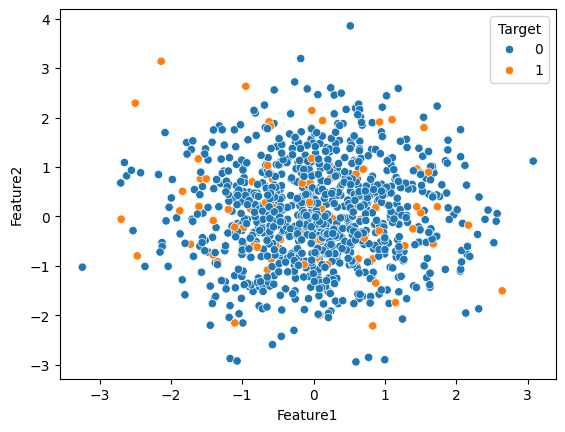

In [6]:
sns.scatterplot(data = df, x = 'Feature1', y= 'Feature2', hue = 'Target')

# under sampling ทำให้ class มาก เท่าๆกับ class น้อย
# over sampling ทำให้ class น้อย เท่าๆกับ class มาก

In [8]:
from imblearn.over_sampling import SMOTE

In [10]:
X = df[['Feature1', 'Feature2']]
y = df['Target']

In [11]:
sm = SMOTE(random_state=0)

In [12]:
X_sample, y_sample = sm.fit_resample(X,y)

In [14]:
y_sample.value_counts()

0    906
1    906
Name: Target, dtype: int64

In [15]:
df2 = pd.DataFrame(X_sample, columns =['Feature1', 'Feature2'])

In [16]:
df2['Target'] = y_sample

In [17]:
df2

,Feature1,Feature2,Target
0,0.496714,-0.138264,0
1,0.647689,1.523030,0
2,-0.234153,-0.234137,0
3,1.579213,0.767435,0
4,-0.469474,0.542560,0
...,...,...,...
1807,-0.242020,1.836812,1
1808,0.197584,-0.759879,1
1809,-0.819632,0.159920,1
1810,-1.215689,-0.717538,1


<Axes: xlabel='Feature1', ylabel='Feature2'>

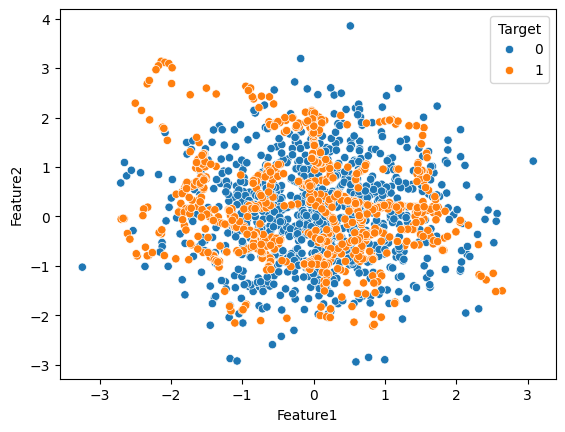

In [18]:
sns.scatterplot(data = df2, x = 'Feature1', y= 'Feature2', hue = 'Target')

In [19]:
# cross validation

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)

from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle= True, random_state=0)

scores = cross_val_score(model, X_sample, y_sample, cv=skf)

In [23]:
scores

array([0.66483516, 0.76373626, 0.72375691, 0.75690608, 0.71823204,
       0.80110497, 0.70718232, 0.72928177, 0.71823204, 0.6961326 ])

In [24]:
scores.mean()

0.7279400157853196

In [26]:
df = pd.read_csv('../data/car_miles_per_gallon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          398 non-null    object 
 1   Year          398 non-null    int64  
 2   Origin        398 non-null    int64  
 3   Cylinders     398 non-null    int64  
 4   Displacement  398 non-null    float64
 5   Horsepower    392 non-null    float64
 6   Weight        398 non-null    int64  
 7   Acceleration  398 non-null    float64
 8   MPG           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


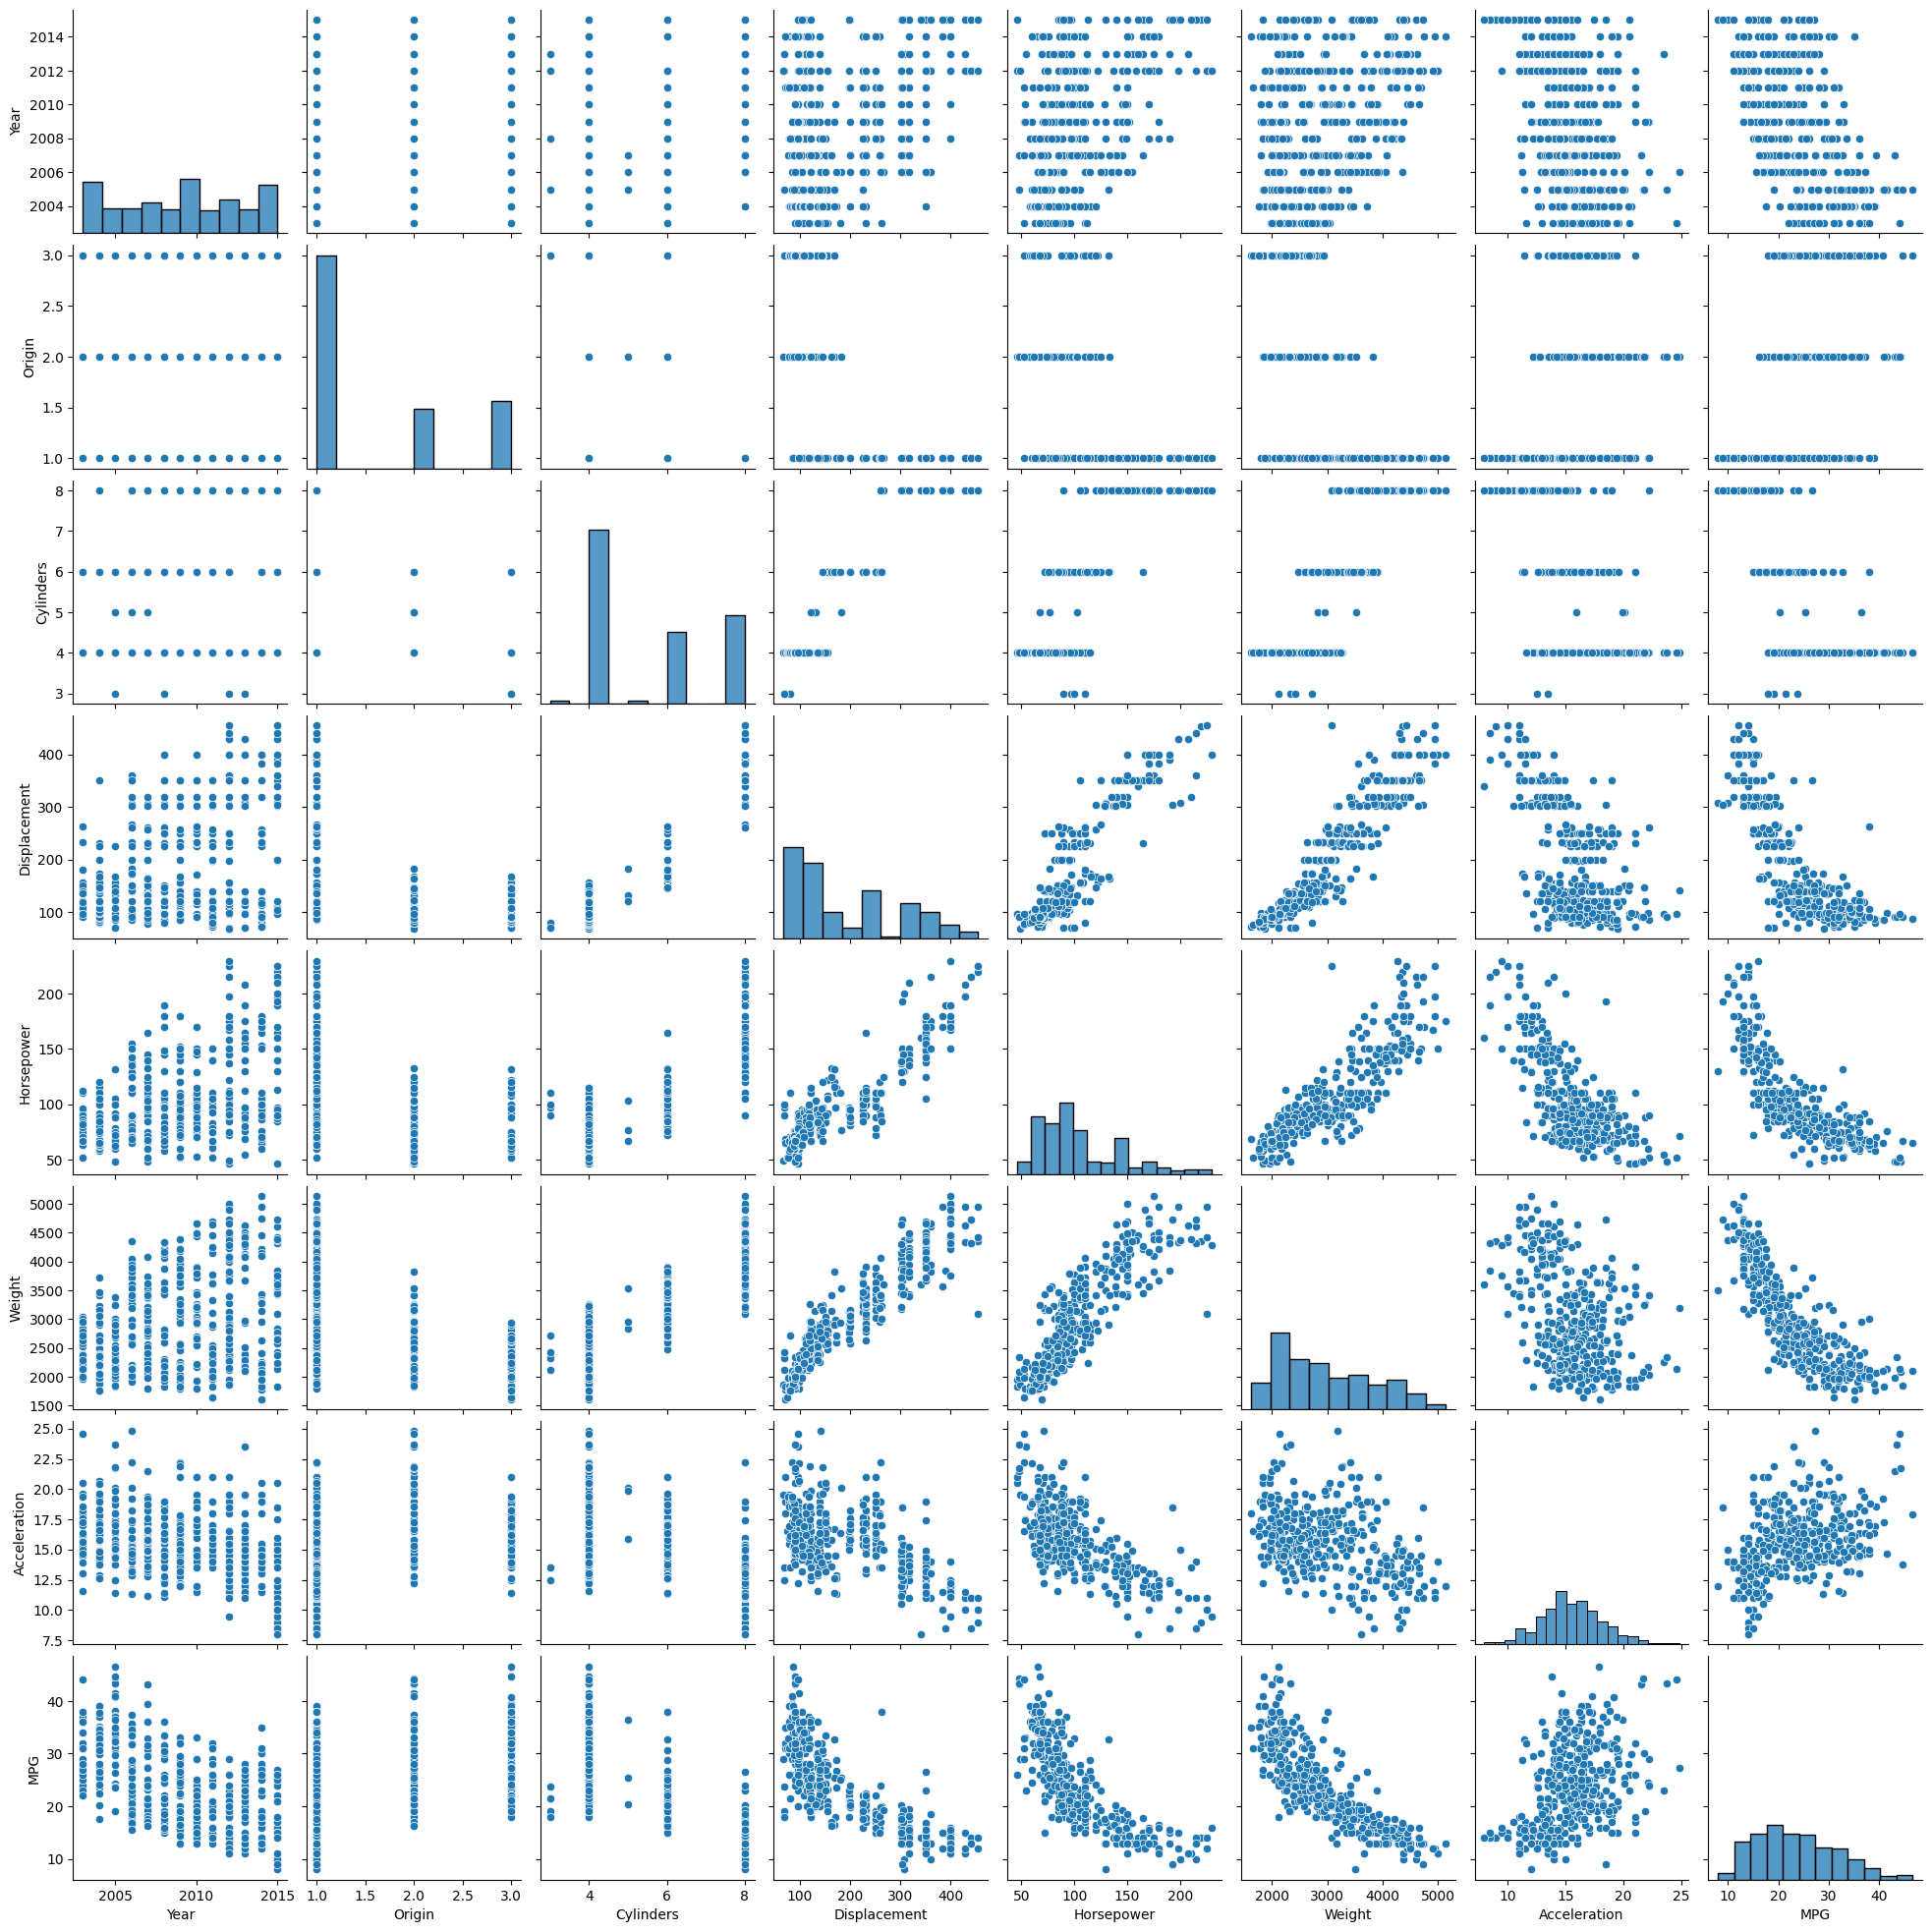

In [27]:
sns.pairplot(data=df)

In [28]:
X = df[['Weight']]
y = df['MPG']

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [31]:
y_pred = model.predict(X)

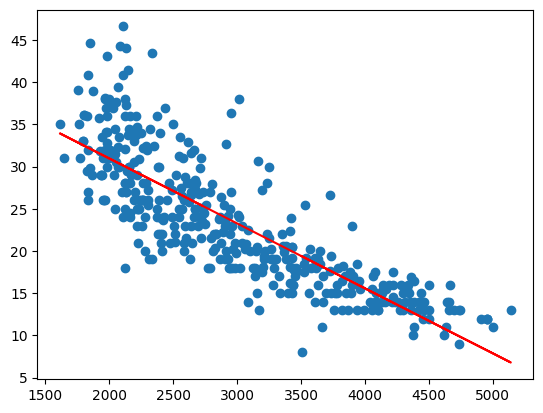

In [33]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
score = mean_squared_error(y ,y_pred)
score

19.102596015152084

In [36]:
from mlxtend.frequent_patterns import apriori, association_rules

In [38]:
data = {'Milk': [1,0,1,1,0,1],
        'Bread': [1,1,0,1,1,0],
        'Butter':[0,1,1,0,1,1],
        'Eggs':[1,0,0,1,1,1]
       }

df = pd.DataFrame(data)
df

,Milk,Bread,Butter,Eggs
0,1,1,0,1
1,0,1,1,0
2,1,0,1,0
3,1,1,0,1
4,0,1,1,1
5,1,0,1,1


In [39]:
f_items = apriori(df, min_support=0.5, use_colnames=True)
f_items

,support,itemsets
0,0.666667,(Milk)
1,0.666667,(Bread)
2,0.666667,(Butter)
3,0.666667,(Eggs)
4,0.500000,"(Eggs, Milk)"
5,0.500000,"(Bread, Eggs)"


In [40]:
rules = association_rules(f_items,  min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Eggs),(Milk),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
1,(Milk),(Eggs),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
2,(Bread),(Eggs),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
3,(Eggs),(Bread),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75


In [41]:
raw_data = pd.read_excel('../data/MarketBasketOptimization.xlsx', header= None)
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
dataset = []
for i in range(0, raw_data.shape[0]):
    tmp = []
    for j in range(0, len(raw_data.loc[0])):
        if raw_data.loc[i,j] is not np.nan:
            tmp.append(raw_data.loc[i, j])
    dataset.append(tmp)

dataset

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [46]:
from mlxtend.preprocessing import TransactionEncoder

In [47]:
encoder = TransactionEncoder()
data = encoder.fit_transform(dataset)
data

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [48]:
df = pd.DataFrame(data, columns = encoder.columns_)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [53]:
df_waterdrop = df.drop(columns='mineral water')

In [63]:
f_items2 = apriori(df_waterdrop, min_support=0.01, use_colnames=True)
f_items2

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
206,0.020931,"(spaghetti, tomatoes)"
207,0.016531,"(turkey, spaghetti)"
208,0.014131,"(whole wheat rice, spaghetti)"
209,0.010532,"(chocolate, eggs, spaghetti)"


In [65]:
rules2 = association_rules(f_items2,  min_threshold=0.3)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,1.0,0.013128,1.224818,0.499424,0.120941,0.183552,0.245256
1,(cooking oil),(spaghetti),0.051060,0.174110,0.015865,0.310705,1.784531,1.0,0.006975,1.198166,0.463284,0.075796,0.165391,0.200911
2,(turkey),(eggs),0.062525,0.179709,0.019464,0.311301,1.732245,1.0,0.008228,1.191072,0.450907,0.087373,0.160420,0.209805
3,(grated cheese),(spaghetti),0.052393,0.174110,0.016531,0.315522,1.812196,1.0,0.007409,1.206597,0.472963,0.078730,0.171223,0.205234
4,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,1.0,0.011138,1.332860,0.732460,0.121457,0.249734,0.243136
5,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,1.0,0.022088,1.373997,0.624943,0.168096,0.272197,0.312015
6,(herb & pepper),(spaghetti),0.049460,0.174110,0.016264,0.328841,1.888695,1.0,0.007653,1.230543,0.495018,0.078457,0.187350,0.211128
7,(soup),(milk),0.050527,0.129583,0.015198,0.300792,2.321232,1.0,0.008651,1.244861,0.599484,0.092158,0.196697,0.209038
8,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,1.0,0.011464,1.267048,0.535186,0.105651,0.210764,0.239939
9,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,1.0,0.005368,1.300468,0.538028,0.053472,0.231046,0.211944
